#  Import

In [3]:
import seaborn as sns 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

sns.set() #initialize the style of the graphics

loadingPath = "CSGO-dataset"

# Visualisation globale des données

## Chargement des données

In [4]:
#loading picks
currentFile = open(loadingPath+"/picks.csv")
#pb avec columns (5).. low_memory=False -> à gérer plus tard 
picks = pd.read_csv(currentFile, low_memory=False)



## Noms des différentes colonnes

In [5]:
# on affiche les colonnes
picks.head(0)


,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over


## Quelques lignes du dataset

In [6]:
nb_ligne = 10
picks.head(nb_ligne)

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,0,2340453,5151,3,123412,Dust2,Nuke,0.0,Mirage,Train,0.0,Vertigo,Inferno,Overpass
2,2020-03-18,New England Whalers,Station7,0,2340461,5243,1,121212,Mirage,Dust2,Vertigo,Nuke,Train,Overpass,0.0,0.0,Inferno
3,2020-03-17,Complexity,forZe,1,2340279,5226,3,123412,Inferno,Nuke,0.0,Overpass,Vertigo,0.0,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,0,2340456,5247,3,123412,Train,Mirage,0.0,Nuke,Inferno,0.0,Overpass,Vertigo,Dust2
5,2020-03-17,BIG,fnatic,1,2340397,5226,3,123412,Train,Dust2,0.0,Nuke,Vertigo,0.0,Inferno,Overpass,Mirage
6,2020-03-17,New England Whalers,District 7,0,2340130,5243,1,121212,Vertigo,Train,Mirage,Dust2,Inferno,Overpass,0.0,0.0,Nuke
7,2020-03-17,Alcoholics Anonymous,Station7,0,2340131,5243,1,121212,Nuke,Overpass,Inferno,Train,Vertigo,Dust2,0.0,0.0,Mirage
8,2020-03-17,Airborne,Paradox,1,2340443,5236,3,123412,Train,Dust2,0.0,Vertigo,Overpass,0.0,Nuke,Mirage,Inferno
9,2020-03-17,Skyfire,Rooster,1,2340444,5236,3,123412,Dust2,Vertigo,0.0,Train,Nuke,0.0,Inferno,Overpass,Mirage


## Répartition des données (moyenne,min,max,25%...)

In [7]:
picks.describe()

,inverted_teams,match_id,event_id,system
count,16035.000000,1.603500e+04,16035.000000,16035.000000
mean,0.530652,2.324015e+06,3790.710508,122448.707078
std,0.499075,1.030392e+04,817.756357,4765.879483
min,0.000000,2.302057e+06,1040.000000,111212.000000
25%,0.000000,2.315876e+06,3116.000000,121212.000000
50%,1.000000,2.323856e+06,3706.000000,123412.000000
75%,1.000000,2.333284e+06,4492.000000,123412.000000
max,1.000000,2.340461e+06,5248.000000,321412.000000


## Informations relatives aux types des colonnes

In [8]:
picks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            16035 non-null  object
 1   team_1          16035 non-null  object
 2   team_2          16035 non-null  object
 3   inverted_teams  16035 non-null  int64 
 4   match_id        16035 non-null  int64 
 5   event_id        16035 non-null  int64 
 6   best_of         16035 non-null  object
 7   system          16035 non-null  int64 
 8   t1_removed_1    16035 non-null  object
 9   t1_removed_2    16035 non-null  object
 10  t1_removed_3    16035 non-null  object
 11  t2_removed_1    16035 non-null  object
 12  t2_removed_2    16035 non-null  object
 13  t2_removed_3    16035 non-null  object
 14  t1_picked_1     16035 non-null  object
 15  t2_picked_1     16035 non-null  object
 16  left_over       16035 non-null  object
dtypes: int64(4), object(13)
memory usage: 2.1+ MB


## Sélection des types numériques

In [9]:
numeric = picks.select_dtypes(include=['int64','float64'])
numeric

,inverted_teams,match_id,event_id,system
0,1,2340454,5151,123412
1,0,2340453,5151,123412
2,0,2340461,5243,121212
3,1,2340279,5226,123412
4,0,2340456,5247,123412
...,...,...,...,...
16030,1,2302059,2099,121212
16031,0,2302058,2099,121212
16032,0,2302057,2099,121212
16033,1,2302063,2099,121212


## Représentation des données numériques sous forme de gradient et highlighting

In [10]:
numeric.head(nb_ligne).style.background_gradient(axis=0).highlight_max(color='crimson').highlight_min(color='navajowhite')

,inverted_teams,match_id,event_id,system
0,1,2340454,5151,123412
1,0,2340453,5151,123412
2,0,2340461,5243,121212
3,1,2340279,5226,123412
4,0,2340456,5247,123412
5,1,2340397,5226,123412
6,0,2340130,5243,121212
7,0,2340131,5243,121212
8,1,2340443,5236,123412
9,1,2340444,5236,123412


## Sélection des types catégoriques

In [11]:
picks.select_dtypes(exclude=['int64','float64'])

,date,team_1,team_2,best_of,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,3,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,3,Dust2,Nuke,0.0,Mirage,Train,0.0,Vertigo,Inferno,Overpass
2,2020-03-18,New England Whalers,Station7,1,Mirage,Dust2,Vertigo,Nuke,Train,Overpass,0.0,0.0,Inferno
3,2020-03-17,Complexity,forZe,3,Inferno,Nuke,0.0,Overpass,Vertigo,0.0,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,3,Train,Mirage,0.0,Nuke,Inferno,0.0,Overpass,Vertigo,Dust2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16030,2016-04-12,GODSENT,Natus Vincere,1,Dust2,Cobblestone,Mirage,Cache,Inferno,Overpass,0.0,0.0,Train
16031,2016-04-12,Liquid,mousesports,1,Inferno,Train,Mirage,Overpass,Cobblestone,Cache,0.0,0.0,Dust2
16032,2016-04-12,Luminosity,TYLOO,1,Dust2,Cache,Inferno,Train,Overpass,Cobblestone,0.0,0.0,Mirage
16033,2016-04-12,FaZe,Virtus.pro,1,Overpass,Cobblestone,Cache,Dust2,Inferno,Mirage,0.0,0.0,Train


## Encodage des données catégoriques de la colonne "left_over"

In [12]:
ord_enc = OrdinalEncoder()
picks['left_over_code'] = ord_enc.fit_transform(picks[['left_over']])
picks[['left_over','left_over_code']].head(11)

,left_over,left_over_code
0,Mirage,20.0
1,Overpass,23.0
2,Inferno,16.0
3,Mirage,20.0
4,Dust2,9.0
5,Mirage,20.0
6,Nuke,22.0
7,Mirage,20.0
8,Inferno,16.0
9,Mirage,20.0


In [13]:
# on affiche juste une case
print(picks.iloc[0,1])

TeamOne


# Nombre de matchs joués par année

In [14]:
# test filtre sur l'équipe
date_filtre = picks.loc[picks['team_1'] == "TeamOne"]
date_filtre

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over,left_over_code
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage,20.0
32,2020-03-15,TeamOne,Big Frames,0,2340313,5151,1,121212,Overpass,Inferno,Mirage,Train,Vertigo,Dust2,0.0,0.0,Nuke,22.0
44,2020-03-14,TeamOne,Rugratz,0,2340309,5151,1,121212,Mirage,Inferno,Vertigo,Dust2,Train,Nuke,0.0,0.0,Overpass,23.0
55,2020-03-13,TeamOne,Mythic,0,2340295,5151,1,121212,Vertigo,Inferno,Mirage,Nuke,Train,Dust2,0.0,0.0,Overpass,23.0
82,2020-03-12,TeamOne,Oceanus,1,2340248,5151,1,121212,Vertigo,Mirage,Overpass,Inferno,Nuke,Train,0.0,0.0,Dust2,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15327,2016-11-11,TeamOne,Black Dragons,1,2306566,2554,3,123412,Cache,Overpass,0.0,Cobblestone,Nuke,0.0,Train,Mirage,Dust2,9.0
15424,2016-11-01,TeamOne,g3x,1,2306146,2539,3,123412,Cache,Overpass,0.0,Nuke,Train,0.0,Mirage,Cobblestone,Dust2,9.0
15490,2016-10-23,TeamOne,Force of Nature,0,2306027,2452,3,121234,Cache,Overpass,0.0,Cobblestone,Nuke,0.0,Train,Dust2,Mirage,20.0
15885,2016-09-01,TeamOne,Remo Brave,1,2304367,2387,3,123412,Nuke,Train,0.0,Overpass,Cobblestone,0.0,Dust2,Mirage,Cache,6.0


In [15]:
annee_filtre = picks.loc[(picks['date'] > "2020-01-01") & (picks['date'] < "2020-12-31")]
annee_filtre

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over,left_over_code
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage,20.0
1,2020-03-18,Rugratz,Bad News Bears,0,2340453,5151,3,123412,Dust2,Nuke,0.0,Mirage,Train,0.0,Vertigo,Inferno,Overpass,23.0
2,2020-03-18,New England Whalers,Station7,0,2340461,5243,1,121212,Mirage,Dust2,Vertigo,Nuke,Train,Overpass,0.0,0.0,Inferno,16.0
3,2020-03-17,Complexity,forZe,1,2340279,5226,3,123412,Inferno,Nuke,0.0,Overpass,Vertigo,0.0,Dust2,Train,Mirage,20.0
4,2020-03-17,Singularity,Endpoint,0,2340456,5247,3,123412,Train,Mirage,0.0,Nuke,Inferno,0.0,Overpass,Vertigo,Dust2,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2020-01-04,Recon 5,LiViD,1,2338774,5148,3,123412,Overpass,Train,0.0,Dust2,Vertigo,0.0,Mirage,Nuke,Inferno,16.0
1019,2020-01-04,Divine,Oceanus,0,2338772,5148,3,123412,Nuke,Vertigo,0.0,Inferno,Overpass,0.0,Dust2,Train,Mirage,20.0
1020,2020-01-03,Brute,Ambush,1,2338763,5142,3,123412,Train,Overpass,0.0,Nuke,Vertigo,0.0,Dust2,Inferno,Mirage,20.0
1021,2020-01-03,SKADE,Ambush,1,2338761,5142,3,123412,Vertigo,Mirage,0.0,Nuke,Dust2,0.0,Inferno,Train,Overpass,23.0


In [16]:
nb_row_2020 = annee_filtre.index
print(len(nb_row_2020))

1023


In [17]:
## Fonction pour récuperer le nombre de matchs joué sur une année  ##
def getNbMatchaYear(annee,df):
    debut = f"{annee}-01-01"
    fin = f"{annee}-12-31"
    tmp_df = df.loc[(df['date'] > debut) & (df['date'] < fin)]
    return len(tmp_df.index)

def dfaYear(annee,df):
    debut = f"{annee}-01-01"
    fin = f"{annee}-12-31"
    tmp_df = df.loc[(df['date'] > debut) & (df['date'] < fin)]
    return tmp_df

In [18]:
getNbMatchaYear(2020,picks)

1023

In [19]:
picks.describe()

,inverted_teams,match_id,event_id,system,left_over_code
count,16035.000000,1.603500e+04,16035.000000,16035.000000,16035.000000
mean,0.530652,2.324015e+06,3790.710508,122448.707078,18.284378
std,0.499075,1.030392e+04,817.756357,4765.879483,7.086712
min,0.000000,2.302057e+06,1040.000000,111212.000000,0.000000
25%,0.000000,2.315876e+06,3116.000000,121212.000000,16.000000
50%,1.000000,2.323856e+06,3706.000000,123412.000000,20.000000
75%,1.000000,2.333284e+06,4492.000000,123412.000000,23.000000
max,1.000000,2.340461e+06,5248.000000,321412.000000,33.000000


In [20]:
maxYear = picks.max()
print((maxYear[0])[0:4])

2020


In [21]:
minYear = picks.min()
print((minYear[0])[0:4])

2016


In [22]:
## On voit donc que les données s'étalent de  2016-2020 ##
myDic = {}

for i in range(2016,2021):
    myDic[i] = getNbMatchaYear(i,picks)
    
myDic


{2016: 961, 2017: 4409, 2018: 5119, 2019: 4522, 2020: 1023}

Text(0, 0.5, 'Nombre de matchs')

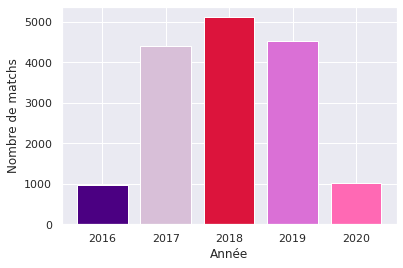

In [23]:
# on affiche
cles = myDic.keys()
values = myDic.values()
plt.bar(cles, values,color=['indigo', 'thistle', 'crimson', 'orchid', 'hotpink'])
plt.xlabel("Année")
plt.ylabel("Nombre de matchs")

# Nombre de matchs joué pour chaque équipe


In [24]:
# test filtre sur l'équipe
team_filtre = picks.loc[(picks['team_1'] == "TeamOne")  & (picks['event_id'] == 5151)]
team_filtre

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over,left_over_code
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage,20.0
32,2020-03-15,TeamOne,Big Frames,0,2340313,5151,1,121212,Overpass,Inferno,Mirage,Train,Vertigo,Dust2,0.0,0.0,Nuke,22.0
44,2020-03-14,TeamOne,Rugratz,0,2340309,5151,1,121212,Mirage,Inferno,Vertigo,Dust2,Train,Nuke,0.0,0.0,Overpass,23.0
55,2020-03-13,TeamOne,Mythic,0,2340295,5151,1,121212,Vertigo,Inferno,Mirage,Nuke,Train,Dust2,0.0,0.0,Overpass,23.0
82,2020-03-12,TeamOne,Oceanus,1,2340248,5151,1,121212,Vertigo,Mirage,Overpass,Inferno,Nuke,Train,0.0,0.0,Dust2,9.0
93,2020-03-12,TeamOne,Divine,1,2340274,5151,1,121212,Inferno,Vertigo,Mirage,Nuke,Train,Overpass,0.0,0.0,Dust2,9.0
149,2020-03-10,TeamOne,Swole Identity,0,2340231,5151,1,121212,Vertigo,Inferno,Mirage,Nuke,Dust2,Train,0.0,0.0,Overpass,23.0
158,2020-03-10,TeamOne,Infinity,0,2340016,5151,1,121212,Mirage,Inferno,Vertigo,Nuke,Dust2,Overpass,0.0,0.0,Train,28.0


In [25]:
nb_row_test = team_filtre.index
print(len(nb_row_test))

8


In [26]:
## Fonction pour récuperer le nombre de matchs joué par un team, sur une année et un championnat précis   ##
def getNbMatchMultiFilter(nomTeam,annee,championnat_id,df):
    debut = f"{annee}-01-01"
    fin = f"{annee}-12-31" 
    if  nomTeam is not None and annee is None and championnat_id is None:
        team_filtre = df.loc[(df['team_1'] == nomTeam)]
        
    elif nomTeam is not None and annee is not None and championnat_id is None:
        team_filtre = df.loc[(df['team_1'] == nomTeam) & (df['date'] > debut) & (df['date'] < fin)]
        
    elif nomTeam is not None and annee is None and championnat_id is not None :
        team_filtre = df.loc[(df['team_1'] == nomTeam) & (df['event_id'] == championnat_id)]
        
    elif nomTeam is None and annee is None and championnat_id is not None:
        team_filtre = df.loc[df['event_id'] == championnat_id]
        
    elif championnat_id is not None and nomTeam is not None and annee is not None:
        team_filtre = df.loc[(df['team_1'] == nomTeam) & (df['date'] > debut) & (df['date'] < fin) & (df['event_id'] == championnat_id)]
    return len(team_filtre.index)

def dfMultiFilter(nomTeam,annee,championnat_id,df):
    debut = f"{annee}-01-01"
    fin = f"{annee}-12-31" 
    if  nomTeam is not None and championnat_id is None and nomTeam is not None:
        team_filtre = df.loc[(df['team_1'] == nomTeam)]
        
    elif annee is not None and nomTeam is not None and championnat_id is None:
        team_filtre = df.loc[(df['team_1'] == nomTeam) & (df['date'] > debut) & (df['date'] < fin)]
        
    elif championnat_id is not None and nomTeam is not None and annee is None :
        team_filtre = df.loc[(df['team_1'] == nomTeam) & (df['event_id'] == championnat_id)]
        
    elif nomTeam is None and annee is None and championnat_id is not None:
        team_filtre = df.loc[df['event_id'] == championnat_id]
        
    elif championnat_id is not None and nomTeam is not None and annee is not None:
        team_filtre = df.loc[(df['team_1'] == nomTeam) & (df['date'] > debut) & (df['date'] < fin) & (df['event_id'] == championnat_id)]
    return team_filtre

In [27]:
getNbMatchMultiFilter(None,None,5152,picks)

106

In [28]:
dfMultiFilter(None,None,5211,picks)


,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over,left_over_code
513,2020-02-17,SKADE,Spirit,0,2339652,5211,3,123412,Vertigo,Dust2,0.0,Inferno,Train,0.0,Overpass,Nuke,Mirage,20.0
522,2020-02-16,HAVU,Gambit Youngsters,1,2339606,5211,3,123412,Inferno,Mirage,0.0,Nuke,Overpass,0.0,Dust2,Vertigo,Train,28.0
532,2020-02-16,GamerLegion,Spirit,1,2339605,5211,3,123412,Vertigo,Dust2,0.0,Overpass,Train,0.0,Mirage,Nuke,Inferno,16.0
533,2020-02-16,SKADE,Copenhagen Flames,1,2339595,5211,3,123412,Vertigo,Overpass,0.0,Dust2,Mirage,0.0,Inferno,Nuke,Train,28.0
535,2020-02-16,Winstrike,AVEZ,1,2339594,5211,3,123412,Inferno,Nuke,0.0,Mirage,Overpass,0.0,Dust2,Train,Vertigo,31.0
539,2020-02-16,Gambit Youngsters,Spirit,1,2339648,5211,3,123412,Nuke,Overpass,0.0,Vertigo,Inferno,0.0,Train,Mirage,Dust2,9.0
541,2020-02-16,SKADE,AVEZ,1,2339626,5211,3,123412,Vertigo,Dust2,0.0,Mirage,Overpass,0.0,Inferno,Nuke,Train,28.0
546,2020-02-16,Winstrike,Gambit Youngsters,0,2339628,5211,3,123412,Inferno,Train,0.0,Nuke,Vertigo,0.0,Overpass,Mirage,Dust2,9.0
547,2020-02-16,Copenhagen Flames,Spirit,0,2339627,5211,3,123412,Dust2,Vertigo,0.0,Train,Overpass,0.0,Nuke,Mirage,Inferno,16.0
550,2020-02-15,Endpoint,Movistar Riders,1,2339557,5211,3,123412,Nuke,Overpass,0.0,Dust2,Vertigo,0.0,Train,Inferno,Mirage,20.0


In [29]:
len(picks.loc[picks['event_id'] == 5211].drop_duplicates())

53

In [30]:
dft = dfMultiFilter(None,None,5211,picks)

In [31]:
bigdata = pd.concat([dft['team_1'], dft['team_2']], ignore_index=True, sort=False)
bg = list( dict.fromkeys(bigdata) )
bg

dft.drop_duplicates(['team_1','team_2'])

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over,left_over_code
513,2020-02-17,SKADE,Spirit,0,2339652,5211,3,123412,Vertigo,Dust2,0.0,Inferno,Train,0.0,Overpass,Nuke,Mirage,20.0
522,2020-02-16,HAVU,Gambit Youngsters,1,2339606,5211,3,123412,Inferno,Mirage,0.0,Nuke,Overpass,0.0,Dust2,Vertigo,Train,28.0
532,2020-02-16,GamerLegion,Spirit,1,2339605,5211,3,123412,Vertigo,Dust2,0.0,Overpass,Train,0.0,Mirage,Nuke,Inferno,16.0
533,2020-02-16,SKADE,Copenhagen Flames,1,2339595,5211,3,123412,Vertigo,Overpass,0.0,Dust2,Mirage,0.0,Inferno,Nuke,Train,28.0
535,2020-02-16,Winstrike,AVEZ,1,2339594,5211,3,123412,Inferno,Nuke,0.0,Mirage,Overpass,0.0,Dust2,Train,Vertigo,31.0
539,2020-02-16,Gambit Youngsters,Spirit,1,2339648,5211,3,123412,Nuke,Overpass,0.0,Vertigo,Inferno,0.0,Train,Mirage,Dust2,9.0
541,2020-02-16,SKADE,AVEZ,1,2339626,5211,3,123412,Vertigo,Dust2,0.0,Mirage,Overpass,0.0,Inferno,Nuke,Train,28.0
546,2020-02-16,Winstrike,Gambit Youngsters,0,2339628,5211,3,123412,Inferno,Train,0.0,Nuke,Vertigo,0.0,Overpass,Mirage,Dust2,9.0
547,2020-02-16,Copenhagen Flames,Spirit,0,2339627,5211,3,123412,Dust2,Vertigo,0.0,Train,Overpass,0.0,Nuke,Mirage,Inferno,16.0
550,2020-02-15,Endpoint,Movistar Riders,1,2339557,5211,3,123412,Nuke,Overpass,0.0,Dust2,Vertigo,0.0,Train,Inferno,Mirage,20.0


In [32]:
getNbMatchMultiFilter("TeamOne",None,5151,picks) # ça marche !

8

In [33]:
# on obtient les différentes teams sans doublons sur toute la période
bigdata = pd.concat([dft['team_1'], dft['team_2']], ignore_index=True, sort=False) 
bg = list( dict.fromkeys(bigdata) )
bg


['SKADE',
 'HAVU',
 'GamerLegion',
 'Winstrike',
 'Gambit Youngsters',
 'Copenhagen Flames',
 'Endpoint',
 'Juggernauts',
 'Hard Legion',
 'pro100',
 'ex-Virtus.pro',
 'Sinners',
 'Singularity',
 'Nexus',
 'AVEZ',
 'Spirit',
 'sAw',
 'Movistar Riders',
 'HellRaisers',
 'Illuminar',
 'Unique',
 'AGO',
 'Secret',
 'Syman',
 'Heretics',
 'SMASH',
 'Tricked',
 '1WIN',
 'Cream']

In [34]:
getNbMatchMultiFilter(bg[5],None,None,picks) 

81

In [35]:
picks.loc[picks['team_1'] == 'Salamander']

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over,left_over_code
1898,2019-10-28,Salamander,FATE,0,2337278,4983,3,123412,Dust2,Vertigo,0.0,Nuke,Mirage,0.0,Inferno,Overpass,Train,28.0
2533,2019-09-15,Salamander,BLUEJAYS,1,2336145,4896,3,123412,Dust2,Inferno,0.0,Overpass,Vertigo,0.0,Mirage,Nuke,Train,28.0
3741,2019-06-06,Salamander,Valiance,0,2334102,4662,3,123412,Vertigo,Dust2,0.0,Overpass,Inferno,0.0,Mirage,Nuke,Train,28.0
4313,2019-04-27,Salamander,Budapest Five,1,2332823,4572,3,121234,Dust2,Nuke,0.0,Cache,Overpass,0.0,Inferno,Mirage,Train,28.0
4645,2019-04-07,Salamander,ATMOS,1,2332326,4497,3,123412,Nuke,Cache,0.0,Train,Overpass,0.0,Inferno,Dust2,Mirage,20.0
4711,2019-04-02,Salamander,pro100,0,2332136,4497,3,123412,Nuke,Overpass,0.0,Train,Dust2,0.0,Inferno,Mirage,Cache,6.0


In [36]:
myDicTeam = {}

for cle in bg:
    myDicTeam[cle] = getNbMatchMultiFilter(cle,None,None,picks) 
    
myDicTeam 
len(myDicTeam)

29

In [37]:
restriction = {}
for x in list(myDicTeam )[0:10]:
    #print ("key {}, value {} ".format(x,  myDicTeam [x]))
    restriction[x] =  myDicTeam [x]
restriction

{'SKADE': 35,
 'HAVU': 161,
 'GamerLegion': 51,
 'Winstrike': 77,
 'Gambit Youngsters': 35,
 'Copenhagen Flames': 81,
 'Endpoint': 54,
 'Juggernauts': 8,
 'Hard Legion': 13,
 'pro100': 125}

Text(0, 0.5, 'Nombre de matchs')

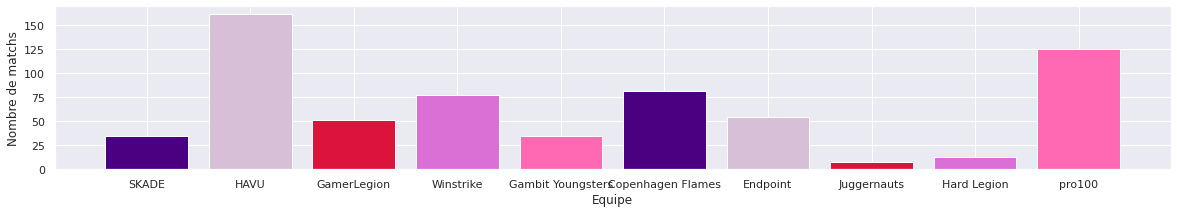

In [38]:
# on affiche
cles = restriction.keys()
values = restriction.values()
plt.figure(figsize=(20, 3))
plt.bar(cles, values,color=['indigo', 'thistle', 'crimson', 'orchid', 'hotpink'])
plt.xlabel("Equipe")
plt.ylabel("Nombre de matchs")

# Nombre de matchs joué pour chaque équipe sur une année particulière

In [39]:


def getAllTeamAyear(year,df):
    df1 = dfaYear(year,df)
    bigdata = pd.concat([df1['team_1'], df1['team_2']], ignore_index=True, sort=False) 
    bg = list( dict.fromkeys(bigdata) )
    return bg
    

getAllTeamAyear(2020,picks)


['TeamOne',
 'Rugratz',
 'New England Whalers',
 'Complexity',
 'Singularity',
 'BIG',
 'Alcoholics Anonymous',
 'Airborne',
 'Skyfire',
 'Espada',
 'HellRaisers',
 'Movistar Riders',
 'Nordavind',
 'Japaleno',
 'North',
 'Infinity',
 'Thunder Logic',
 'Chaos',
 'Bad News Bears',
 'Recon 5',
 'In The Lab',
 'Spirit',
 'Under 21',
 'District 7',
 'GODSENT',
 'NiP',
 'Swole Identity',
 'Oceanus',
 'Orgless',
 'Incept',
 'Endpoint',
 'FunPlus Phoenix',
 'Paradox',
 'Triumph',
 'EGOBOYZ',
 'Infamous',
 'Envy',
 'Imperial',
 'Station7',
 'MIBR',
 'Divine',
 'Mythic',
 'Big Frames',
 'Copenhagen Flames',
 'Neverest',
 'Swole Patrol',
 'HAVU',
 'Wisla Krakow',
 'pro100',
 'Nemiga',
 'Rooster',
 'Ground Zero',
 'VERTEX',
 'TRIDENT',
 'LiViD',
 'Monstars',
 'ex-eUnited',
 'Formidable',
 'Esper',
 'Sprout',
 'Illuminar',
 'PACT',
 'AVANT',
 'Yeah',
 'AGO',
 'Demolition Crew',
 'Chiefs',
 'I sleep',
 'Ze Pug Godz',
 'GamerLegion',
 'Unicorns of Love',
 'FURY',
 'JiJieHao',
 'KOVA',
 'SMASH',
 'EH

In [40]:
myDicTeamYear = {}
bgYear = getAllTeamAyear(2020,picks)

for cle in bgYear:
    myDicTeamYear[cle] = getNbMatchMultiFilter(cle,2020,None,picks) 
    
myDicTeamYear 


{'TeamOne': 11,
 'Rugratz': 12,
 'New England Whalers': 14,
 'Complexity': 7,
 'Singularity': 7,
 'BIG': 10,
 'Alcoholics Anonymous': 1,
 'Airborne': 11,
 'Skyfire': 10,
 'Espada': 6,
 'HellRaisers': 5,
 'Movistar Riders': 5,
 'Nordavind': 6,
 'Japaleno': 4,
 'North': 5,
 'Infinity': 12,
 'Thunder Logic': 10,
 'Chaos': 20,
 'Bad News Bears': 11,
 'Recon 5': 13,
 'In The Lab': 9,
 'Spirit': 6,
 'Under 21': 10,
 'District 7': 4,
 'GODSENT': 6,
 'NiP': 5,
 'Swole Identity': 10,
 'Oceanus': 11,
 'Orgless': 12,
 'Incept': 11,
 'Endpoint': 6,
 'FunPlus Phoenix': 1,
 'Paradox': 18,
 'Triumph': 17,
 'EGOBOYZ': 1,
 'Infamous': 1,
 'Envy': 3,
 'Imperial': 6,
 'Station7': 13,
 'MIBR': 5,
 'Divine': 15,
 'Mythic': 15,
 'Big Frames': 13,
 'Copenhagen Flames': 13,
 'Neverest': 1,
 'Swole Patrol': 3,
 'HAVU': 14,
 'Wisla Krakow': 3,
 'pro100': 10,
 'Nemiga': 8,
 'Rooster': 8,
 'Ground Zero': 7,
 'VERTEX': 1,
 'TRIDENT': 8,
 'LiViD': 7,
 'Monstars': 11,
 'ex-eUnited': 3,
 'Formidable': 7,
 'Esper': 7,

In [41]:
restrictionYear = {}
for x in list(myDicTeamYear )[0:10]:
    #print ("key {}, value {} ".format(x,  myDicTeam [x]))
    restrictionYear[x] =  myDicTeamYear [x]
restrictionYear

{'TeamOne': 11,
 'Rugratz': 12,
 'New England Whalers': 14,
 'Complexity': 7,
 'Singularity': 7,
 'BIG': 10,
 'Alcoholics Anonymous': 1,
 'Airborne': 11,
 'Skyfire': 10,
 'Espada': 6}

Text(0, 0.5, 'Nombre de matchs')

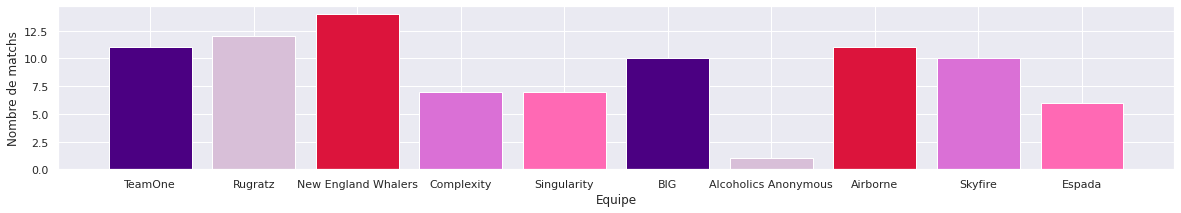

In [42]:
# on affiche
cles = restrictionYear.keys()
values = restrictionYear.values()
plt.figure(figsize=(20, 3))
plt.bar(cles, values,color=['indigo', 'thistle', 'crimson', 'orchid', 'hotpink'])
plt.xlabel("Equipe")
plt.ylabel("Nombre de matchs")

# Nombre de matchs joué pour chaque équipe sur un évenement particulier

In [43]:
## maintenant on filtre avec un id de championnat : par ex 5151

getNbMatchMultiFilter(None,None,5151,picks)


183

dfMultiFilter(None,None,5151,picks)

In [44]:
def getAllTeamAnEvent(event,df):
    df1 = df.loc[df['event_id'] == event]
    bigdata = pd.concat([df1['team_1'], df1['team_2']], ignore_index=True, sort=False) 
    bg = list( dict.fromkeys(bigdata) )
    return bg

getAllTeamAnEvent(5151,picks)

['TeamOne',
 'Rugratz',
 'Infinity',
 'Thunder Logic',
 'Chaos',
 'Bad News Bears',
 'New England Whalers',
 'Recon 5',
 'In The Lab',
 'Under 21',
 'District 7',
 'Swole Identity',
 'Oceanus',
 'Triumph',
 'Station7',
 'Divine',
 'Mythic',
 'Big Frames',
 'Swole Patrol',
 'LiViD',
 'Monstars',
 'ex-eUnited',
 'eUnited',
 'Riot Squad',
 "Asuna's Anime Aimers"]

In [45]:
myDicTeamEvent = {}
bgEvent = getAllTeamAnEvent(5151,picks)

for cle in bgEvent:
    myDicTeamEvent[cle] = getNbMatchMultiFilter(cle,None,5151,picks) 
    
myDicTeamEvent 

{'TeamOne': 8,
 'Rugratz': 8,
 'Infinity': 10,
 'Thunder Logic': 10,
 'Chaos': 8,
 'Bad News Bears': 8,
 'New England Whalers': 8,
 'Recon 5': 9,
 'In The Lab': 9,
 'Under 21': 10,
 'District 7': 4,
 'Swole Identity': 8,
 'Oceanus': 10,
 'Triumph': 9,
 'Station7': 11,
 'Divine': 11,
 'Mythic': 12,
 'Big Frames': 8,
 'Swole Patrol': 3,
 'LiViD': 4,
 'Monstars': 9,
 'ex-eUnited': 3,
 'eUnited': 1,
 'Riot Squad': 1,
 "Asuna's Anime Aimers": 1}

In [46]:
restrictionEvent = {}
for x in list(myDicTeamEvent )[0:10]:
    #print ("key {}, value {} ".format(x,  myDicTeam [x]))
    restrictionEvent[x] =  myDicTeamEvent [x]
restrictionEvent

{'TeamOne': 8,
 'Rugratz': 8,
 'Infinity': 10,
 'Thunder Logic': 10,
 'Chaos': 8,
 'Bad News Bears': 8,
 'New England Whalers': 8,
 'Recon 5': 9,
 'In The Lab': 9,
 'Under 21': 10}

Text(0, 0.5, 'Nombre de matchs')

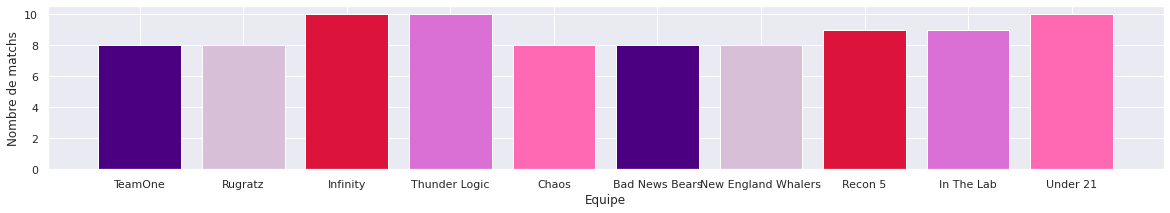

In [47]:
# on affiche
cles = restrictionEvent .keys()
values = restrictionEvent .values()
plt.figure(figsize=(20, 3))
plt.bar(cles, values,color=['indigo', 'thistle', 'crimson', 'orchid', 'hotpink'])
plt.xlabel("Equipe")
plt.ylabel("Nombre de matchs")